# Linear fit

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [41]:
data = pd.read_csv('../datasets/gypsum_ks_daily_2018.csv')


In [42]:
# Explore headers
data.head(5)

,TIMESTAMP,STATION,PRESSUREAVG,PRESSUREMAX,PRESSUREMIN,SLPAVG,TEMP2MAVG,TEMP2MMIN,TEMP2MMAX,TEMP10MAVG,...,SOILTMP10MAX,SOILTMP10MIN,SOILTMP5AVG655,SOILTMP10AVG655,SOILTMP20AVG655,SOILTMP50AVG655,VWC5CM,VWC10CM,VWC20CM,VWC50CM
0,1/1/18 0:00,Gypsum,99.44,100.03,98.73,104.44,-15.15,-19.56,-11.00,-15.31,...,-1.18,-2.45,-1.33,-1.14,0.74,3.50,0.1377,0.1167,0.2665,0.2203
1,1/2/18 0:00,Gypsum,99.79,100.14,99.40,104.88,-16.48,-22.10,-10.40,-16.38,...,-1.56,-3.46,-2.10,-1.82,0.28,3.13,0.1234,0.1021,0.2642,0.2196
2,1/3/18 0:00,Gypsum,98.87,99.52,97.94,103.81,-11.03,-20.64,-2.71,-10.66,...,-1.49,-3.61,-2.21,-1.93,-0.08,2.76,0.1206,0.0965,0.2353,0.2189
3,1/4/18 0:00,Gypsum,98.22,98.54,97.90,102.99,-5.83,-11.79,0.24,-5.01,...,-0.98,-2.67,-1.60,-1.46,-0.21,2.45,0.1235,0.0973,0.2094,0.2182
4,1/5/18 0:00,Gypsum,98.10,98.42,97.75,102.88,-4.73,-14.22,5.36,-4.23,...,-0.72,-2.81,-1.54,-1.38,-0.25,2.25,0.1249,0.0976,0.2047,0.2180


In [55]:
# Explore last few rows
data.tail(5)

,TIMESTAMP,STATION,PRESSUREAVG,PRESSUREMAX,PRESSUREMIN,SLPAVG,TEMP2MAVG,TEMP2MMIN,TEMP2MMAX,TEMP10MAVG,...,SOILTMP10MAX,SOILTMP10MIN,SOILTMP5AVG655,SOILTMP10AVG655,SOILTMP20AVG655,SOILTMP50AVG655,VWC5CM,VWC10CM,VWC20CM,VWC50CM
360,12/27/18 0:00,Gypsum,96.71,97.59,95.54,101.17,9.22,5.78,12.36,9.18,...,7.24,3.58,5.15,4.97,4.60,5.18,0.3561,0.3666,0.3534,0.2972
361,12/28/18 0:00,Gypsum,95.77,96.97,95.02,100.21,2.60,-4.05,12.36,2.44,...,7.45,3.46,6.26,6.26,6.24,5.77,0.3786,0.3810,0.3856,0.3445
362,12/29/18 0:00,Gypsum,97.72,98.44,96.89,102.44,-4.92,-8.76,-2.09,-5.07,...,3.46,1.63,2.35,2.72,4.30,5.93,0.3588,0.3645,0.3699,0.3204
363,12/30/18 0:00,Gypsum,98.16,98.55,97.54,102.95,-6.38,-9.77,-0.55,-6.49,...,1.63,0.97,1.22,1.58,2.96,5.26,0.3477,0.3539,0.3612,0.3131
364,12/31/18 0:00,Gypsum,96.75,97.64,96.08,101.38,0.28,-5.52,8.13,0.21,...,0.98,0.71,0.82,1.15,2.32,4.67,0.3373,0.3455,0.3557,0.3089


In [90]:
# Fill missing values
x_obs = data['TEMP2MAVG'].fillna(method='backfill')
y_obs = data['TEMP10MAVG'].fillna(method='backfill')

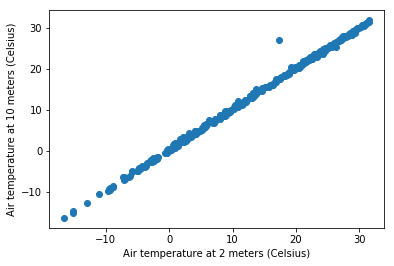

In [91]:
# Compare air temperature at 2 and 10 meters.
plt.scatter(x_obs, y_obs, label='obs')
plt.xlabel('Air temperature at 2 meters (Celsius)')
plt.ylabel('Air temperature at 10 meters (Celsius)')
plt.show()

In [92]:
# Fit linear model using linregress
slope, intercept, r_val, p_val, std_err = stats.linregress(x_obs, y_obs)
print('slope:',slope)
print('intercept:',intercept)
print('r:',r_val)
print('r-squared:',r_val**2)


slope: 0.9951679617412289
intercept: 0.24828997625776061
r: 0.9987226605452462
r-squared: 0.997446952686575


In [93]:
# Predict air temperature at 10 m (y_pred) based on temperature at 2 m (x_obs)
y_pred = intercept + slope*x_obs

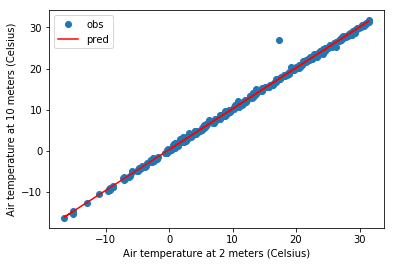

In [94]:
# Figure of data and linear model
plt.plot(x_obs, y_obs, 'o', label='obs')
plt.plot(x_obs, y_pred, 'r', label='pred')
plt.legend()
plt.xlabel('Air temperature at 2 meters (Celsius)')
plt.ylabel('Air temperature at 10 meters (Celsius)')
plt.show()

You can try other variables:
- how close is the relationship between between air temperature at 2 meters and air relative humidity at 2 meters? 

- Can we predict soil temperature at 5 cm depth from air temperature?

- Is atmospheric pressure related to air temperature?

In [108]:
# Re-define y_obs with a new variable.

y_obs = data['PRESSUREAVG'].fillna(method='backfill')

In [105]:
fit_info = stats.linregress(x_obs, y_obs)
fit_info

LinregressResult(slope=-0.03174985091216577, intercept=97.66035004164551, rvalue=-0.5201324155291819, pvalue=1.090025613211316e-26, stderr=0.0027363766395771005)

In [106]:
y_pred = fit_info.intercept + fit_info.slope*x_obs

By calling `linregress` with a single output variable we can group all the parameters into a single object. This can be handy in order to keep our code a bit cleaner.

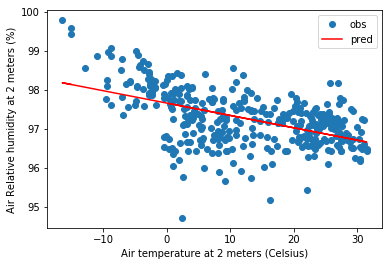

In [107]:
# Figure of data and linear model
plt.plot(x_obs, y_obs, 'o', label='obs')
plt.plot(x_obs, y_pred, 'r', label='pred')
plt.legend()
plt.xlabel('Air temperature at 2 meters (Celsius)')
plt.ylabel('Air Relative humidity at 2 meters (%)')
plt.show()

In [109]:
print('r-value:', round(fit_info.rvalue,3))

r-value: -0.52


There is some evident relationship, but not nearly as strong as the previous one between air temperature at 2 and 10 meters. We can check the p-value to see if this apparently weaker linear correlation is statistically significant or not.

In [110]:
print('p-value:', fit_info.pvalue)

p-value: 1.090025613211316e-26


Indeed, the linear regression model between air temperature and air pressure is highly significant.